<a href="https://colab.research.google.com/github/Sai0472003/ECO482_TORNADO_PROJECT/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Patent Litigations: What Are The Costs And Who Bears Them?***

# ***Section 1: Introduction:***

# ***Section 2: Data Cleaning/Loading:***

In [ ]:
#loading useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading csv's that have been a little precleaned and merged to avoid excessive
#lines of code for the cleaning section

#loading up csv's into Data Frames
merged_cases_FJC = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_cases_JFC.csv')
subset_plaintiff_npm = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_plaintiff_npm.csv')
subset_defendent_npm = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_defendent_npm.csv')
subset_plaintiff_RnD = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_plaintiff_RnD.csv')
subset_defendent_RnD = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_defendent_RnD.csv')

In [ ]:
#creating plaintiff-only df with all the Y and X variables
#(no index or geospatial data)
plaintiffs_complete = pd.merge(subset_plaintiff_npm,
                               subset_plaintiff_RnD,
                               on=[
                                   "case_row_id", "disp_dismissed",
                                   "disp_settled", "disp_before_issue_joined",
                                   "infringement_35_271", "case_length",
                                   "info_tech", "health_care", "materials",
                                   "industrials", "consumer_discretionary"],
                               how = 'outer')

plaintiffs_complete = plaintiffs_complete.drop_duplicates()
plaintiffs_complete = plaintiffs_complete[[
                            "delta_npm", "delta_rnd_sales","disp_dismissed",
                            "disp_settled", "disp_before_issue_joined",
                            "infringement_35_271", "case_length", "info_tech",
                            "health_care","materials","industrials",
                            "consumer_discretionary"
                             ]]

In [ ]:
plaintiffs_complete.head()

,delta_npm,delta_rnd_sales,disp_dismissed,disp_settled,disp_before_issue_joined,infringement_35_271,case_length,info_tech,health_care,materials,industrials,consumer_discretionary
0,NaN,0.009418,0.0,0.0,0.0,0.0,6.588926,0,0,0,1,0
1,-0.056082,NaN,0.0,0.0,0.0,0.0,727.000000,0,0,0,1,0
2,NaN,0.005320,0.0,0.0,1.0,0.0,4.595120,1,0,0,0,0
3,-0.061502,NaN,0.0,0.0,1.0,0.0,99.000000,1,0,0,0,0
4,NaN,0.017003,1.0,1.0,1.0,1.0,5.225747,0,1,0,0,0


In [ ]:
#creating defendent-only df with all the Y and X variables,
#(no index or geospatial data)
defendents_complete = pd.merge(subset_defendents_npm,
                               subset_defendents_RnD,
                               on=[
                                   "case_row_id", "disp_dismissed",
                                   "disp_settled", "disp_before_issue_joined",
                                   "infringement_35_271", "case_length",
                                   "info_tech", "health_care", "materials",
                                   "industrials", "consumer_discretionary"],
                               how = 'outer')

defendents_complete = defendents_complete.drop_duplicates()
defendents_complete = defendents_complete[[
                            "delta_npm", "delta_rnd_sales","disp_dismissed",
                            "disp_settled", "disp_before_issue_joined",
                            "infringement_35_271", "case_length", "info_tech",
                            "health_care","materials","industrials",
                            "consumer_discretionary"
                             ]]

In [ ]:
defendents_complete.head()

,delta_npm,delta_rnd_sales,disp_dismissed,disp_settled,disp_before_issue_joined,infringement_35_271,case_length,info_tech,health_care,materials,industrials,consumer_discretionary
0,-0.523178,0.043103,1.0,0.0,1.0,0.0,6.169611,0,0,0,1,0
1,-0.002907,0.000000,1.0,1.0,0.0,0.0,6.350886,0,0,0,0,0
2,0.004274,0.005925,1.0,1.0,0.0,0.0,6.037871,0,0,0,1,0
3,0.001192,-0.000766,1.0,1.0,1.0,1.0,5.484797,0,0,0,0,1
4,0.013409,-0.003403,1.0,1.0,1.0,1.0,5.123964,0,1,0,0,0


# ***Section 3: Summary Statistics:***

In [ ]:
plaintiffs_complete.describe()

,delta_npm,delta_rnd_sales,disp_dismissed,disp_settled,disp_before_issue_joined,infringement_35_271,case_length,info_tech,health_care,materials,industrials,consumer_discretionary
count,1147.000000,1157.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,8.741107,-0.764724,0.733941,0.619358,0.280816,0.517361,272.483973,0.394531,0.258681,0.069444,0.108941,0.118056
std,184.206505,82.468427,0.441991,0.485650,0.449495,0.499807,448.999728,0.488856,0.438005,0.254264,0.311633,0.322744
min,-348.520087,-1273.693333,0.000000,0.000000,0.000000,0.000000,3.044522,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.033832,-0.003042,0.000000,0.000000,0.000000,0.000000,5.934894,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.000521,0.000473,1.000000,1.000000,0.000000,1.000000,8.012618,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.025305,0.010271,1.000000,1.000000,1.000000,1.000000,378.250000,1.000000,1.000000,0.000000,0.000000,0.000000
max,3594.053333,1212.250000,1.000000,1.000000,1.000000,1.000000,4201.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
defendents_complete.describe()

,delta_npm,delta_rnd_sales,disp_dismissed,disp_settled,disp_before_issue_joined,infringement_35_271,case_length,info_tech,health_care,materials,industrials,consumer_discretionary
count,2557.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000
mean,-0.079224,0.013422,0.816335,0.604533,0.418132,0.633060,5.586478,0.148105,0.386088,0.026182,0.091442,0.154357
std,3.238747,0.720413,0.387287,0.489046,0.493349,0.482064,0.966466,0.355273,0.486946,0.159708,0.288293,0.361361
min,-152.326629,-7.251561,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.019312,-0.001439,1.000000,0.000000,0.000000,0.000000,4.863673,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001188,0.000000,1.000000,1.000000,0.000000,1.000000,5.583496,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.021006,0.003631,1.000000,1.000000,1.000000,1.000000,6.309005,0.000000,1.000000,0.000000,0.000000,0.000000
max,18.700229,31.787848,1.000000,1.000000,1.000000,1.000000,8.628019,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Section 4: Data Visualizations:***

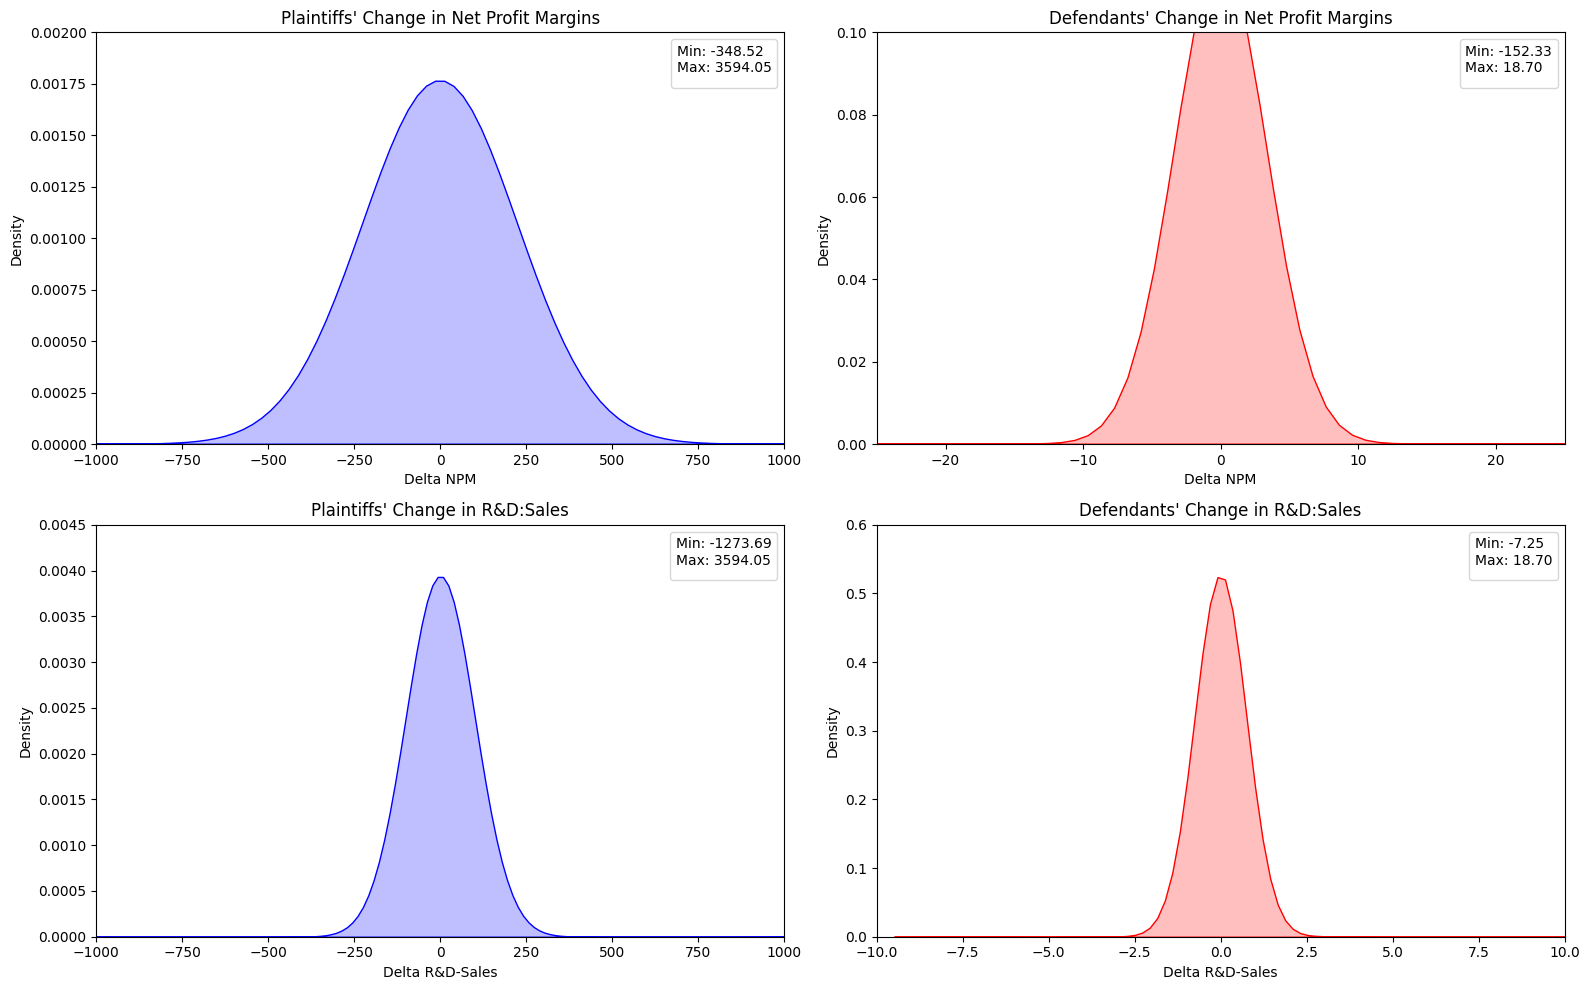

In [ ]:
# Density plots for NPM and RnD:Sales
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot KDE for plaintiffs NPM
sns.kdeplot(plaintiffs_complete["delta_npm"],
            fill=True, color="blue", ax=axes[0,0],bw_adjust=5)
axes[0,0].set_title("Plaintiffs' Change in Net Profit Margins")
axes[0,0].set_xlabel("Delta NPM")
axes[0,0].set_ylabel("Density")
axes[0,0].grid(False)

# Plot KDE for defendants NPM
sns.kdeplot(defendents_complete["delta_npm"],
            fill=True, color="red", ax=axes[0,1],bw_adjust=5)
axes[0,1].set_title("Defendants' Change in Net Profit Margins")
axes[0,1].set_xlabel("Delta NPM")
axes[0,1].grid(False)

# Plot KDE for plaintiffs Rnd
sns.kdeplot(plaintiffs_complete["delta_rnd_sales"],
            fill=True, color="blue", ax=axes[1,0], bw_adjust=5)
axes[1,0].set_title("Plaintiffs' Change in R&D:Sales")
axes[1,0].set_xlabel("Delta R&D-Sales")
axes[1,0].set_ylabel("Density")
axes[1,0].grid(False)

# Plot KDE for defendants Rnd
sns.kdeplot(defendents_complete["delta_rnd_sales"],
            fill=True, color="red", ax=axes[1,1],bw_adjust=5)
axes[1,1].set_title("Defendants' Change in R&D:Sales")
axes[1,1].set_xlabel("Delta R&D-Sales")
axes[1,1].grid(False)


# Add min and max values as text legend
axes[0,0].legend(
    handles=[],
    title=f"Min: {plaintiffs_complete['delta_npm'].min():.2f}\nMax: {plaintiffs_complete['delta_npm'].max():.2f}",
    loc="upper right")
axes[0,1].legend(
    handles=[],
    title=f"Min: {defendents_complete['delta_npm'].min():.2f}\nMax: {defendents_complete['delta_npm'].max():.2f}",
    loc="upper right")
axes[1,0].legend(
    handles=[],
    title=f"Min: {plaintiffs_complete['delta_rnd_sales'].min():.2f}\nMax: {plaintiffs_complete['delta_npm'].max():.2f}",
    loc="upper right")
axes[1,1].legend(
    handles=[],
    title=f"Min: {defendents_complete['delta_rnd_sales'].min():.2f}\nMax: {defendents_complete['delta_npm'].max():.2f}",
    loc="upper right")



#zooming into the peaks
axes[0,0].set_ylim(0, 0.002)
axes[0,0].set_xlim(-1000, 1000)
axes[0,1].set_ylim(0, 0.1)
axes[0,1].set_xlim(-25, 25)
axes[1,0].set_ylim(0, 0.0045)
axes[1,0].set_xlim(-1000, 1000)
axes[1,1].set_ylim(0, 0.6)
axes[1,1].set_xlim(-10, 10)

plt.tight_layout()
plt.show()

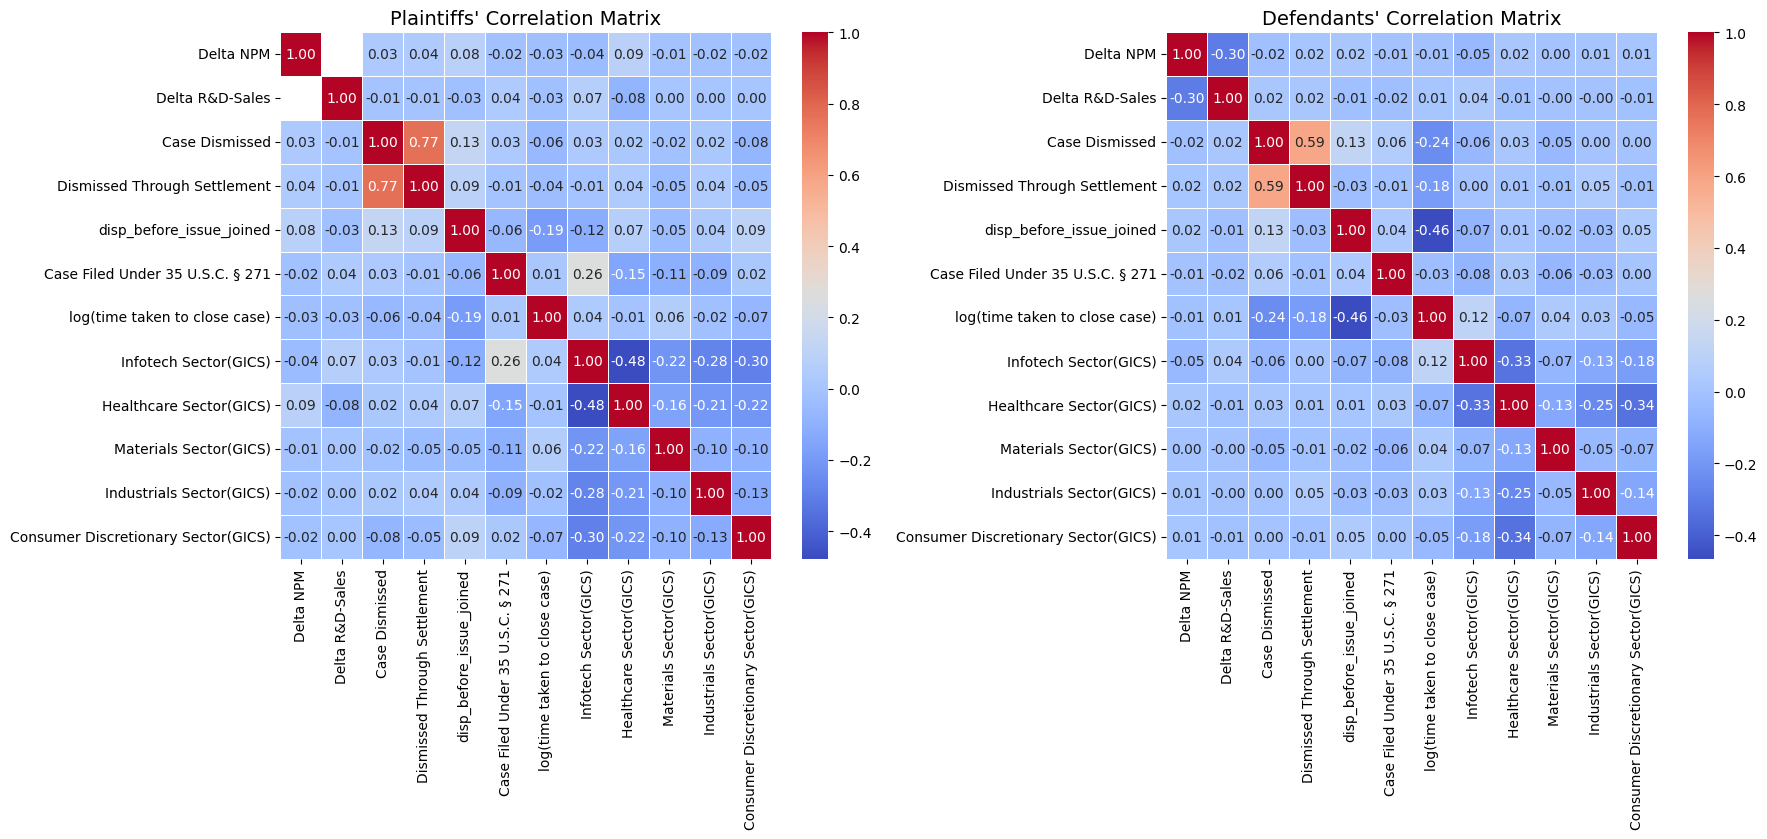

In [ ]:
# Compute correlation matrices
corr_matrix_plt = plaintiffs_complete.corr()
corr_matrix_def = defendents_complete.corr()

# Rename labels using the provided mapping
label_mapping = {
    "delta_npm": "Delta NPM",
    "delta_rnd_sales": "Delta R&D-Sales",
    "disp_dismissed": "Case Dismissed",
    "disp_settled": "Dismissed Through Settlement",
    ":disp_before_issue_joined": "Dismissed Before Issue Joined",
    "infringement_35_271": "Case Filed Under 35 U.S.C. § 271",
    "case_length": "log(time taken to close case)",
    "info_tech": "Infotech Sector(GICS)",
    "health_care": "Healthcare Sector(GICS)",
    "materials": "Materials Sector(GICS)",
    "industrials": "Industrials Sector(GICS)",
    "consumer_discretionary": "Consumer Discretionary Sector(GICS)"
}

# Apply clean labels
corr_matrix_plt = corr_matrix_plt.rename(columns=label_mapping, index=label_mapping)
corr_matrix_def = corr_matrix_def.rename(columns=label_mapping, index=label_mapping)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # Increase size for clarity

# Plot for Plaintiffs
sns.heatmap(corr_matrix_plt, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Plaintiffs' Correlation Matrix", fontsize=14)
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability
axes[0].tick_params(axis='y', rotation=0)   # Keep y-axis labels straight

# Plot for Defendants
sns.heatmap(corr_matrix_def, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Defendants' Correlation Matrix", fontsize=14)
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.show()

# ***Section 5: The Message:***

# ***Section 6: Maps:***

# ***Section 7: Regressions:***

In [ ]:
# Regression Table 1.1: The imapct of Case Disposals on Net Profit Margins[Defendents]

#base model
model1_d = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled', data=subset_defendent_npm).fit()
#includes interactions
model2_d = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined', data=subset_defendent_npm).fit()
#includes interactions and case cause and length
model3_d = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length', data=subset_defendent_npm).fit()
#includes interactions, case cause and GICS sector ficxed effects and case
model4_d = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length + info_tech + health_care + materials + industrials + consumer_discretionary', data=subset_defendent_npm).fit()


#The imapct of Case Disposals on Net Profit Margins[Plaintiffs]

#based model
model1_p = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled', data=subset_plaintiff_npm).fit()
#includes interactions
model2_p = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined', data=subset_plaintiff_npm).fit()
#includes interactions and case cause and length
model3_p = smf.ols('delta_npm ~ disp_dismissed+ disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length', data=subset_plaintiff_npm).fit()
#includes interactions, case cause and GICS sector ficxed effects and case
model4_p = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length + info_tech + health_care + materials + industrials + consumer_discretionary', data=subset_plaintiff_npm).fit()


#creating stargazer object
stargazer = Stargazer([model1_d, model2_d, model3_d, model4_d,
                       model1_p, model2_p, model3_p, model4_p])

# Custom column names
stargazer.custom_columns([
    "Defendant Model 1", "Defendant Model 2", "Defendant Model 3", "Defendant Model 4",
    "Plaintiff Model 1", "Plaintiff Model 2", "Plaintiff Model 3", "Plaintiff Model 4",
], [1, 1, 1, 1, 1, 1, 1, 1])

# Force variable order to match model specification
stargazer.covariate_order(["Intercept", "disp_dismissed", "disp_dismissed:disp_settled",
                            "disp_dismissed:disp_before_issue_joined", "infringement_35_271",
                            "case_length", "info_tech", "health_care", "materials",
                            "industrials", "consumer_discretionary"])

stargazer.rename_covariates({
    "disp_dismissed": "Case Dismissed",
    "disp_dismissed:disp_settled": "Dismissed Through Settlement",
    "disp_dismissed:disp_before_issue_joined": "Dismissed Before Issue Joined",
    "infringement_35_271": "Case Filed Under 35 U.S.C. § 271",
    "case_length": "log(time taken to cose case)",
    "info_tech": "Infotech Sector(GICS)",
    "health_care": "Healthcare Sector(GICS)",
    "materials": "Materials Sector(GICS)",
    "industrials": "Industrials Sector(GICS)",
    "consumer_discretionary": "Consumer Discretionary Sector(GICS)"})

stargazer.title("Esimated effect of Case Outcomes on Plaintiff Firms' Net Profit Margins")

# Display in Jupyter Notebook
display(HTML(stargazer.render_html()))

In [ ]:
# Regression Table 2.1: The imapct of Case Disposals on RnD-Sales Ratio[Defendent]

#base model
model1_d = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled', data=subset_defendent_RnD).fit()
#includes interactions
model2_d = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined', data=subset_defendent_RnD).fit()
#includes interactions and case cause
model3_d = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length', data=subset_defendent_RnD).fit()
#includes interactions, case cause and GICS sector ficxed effects and case
model4_d = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length + info_tech + health_care + materials + industrials + consumer_discretionary', data=subset_defendent_RnD).fit()


# Regression Table 2.2: The imapct of Case Disposals on RnD-Sales Ratio[Plaintiffs]

#based model
model1_p = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled', data=subset_plaintiff_RnD).fit()
#includes interactions
model2_p = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined', data=subset_plaintiff_RnD).fit()
#includes interactions and case cause
model3_p = smf.ols('delta_rnd_sales ~ disp_dismissed+ disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length', data=subset_plaintiff_RnD).fit()
#includes interactions, case cause and GICS sector ficxed effects and case
model4_p = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length + info_tech + health_care + materials + industrials + consumer_discretionary', data=subset_plaintiff_RnD).fit()


#creating stargazer object
stargazer = Stargazer([model1_d, model2_d, model3_d, model4_d,
                       model1_p, model2_p, model3_p, model4_p])

# Custom column names
stargazer.custom_columns([
    "Defendant Model 1", "Defendant Model 2", "Defendant Model 3", "Defendant Model 4",
    "Plaintiff Model 1", "Plaintiff Model 2", "Plaintiff Model 3", "Plaintiff Model 4",
], [1, 1, 1, 1, 1, 1, 1, 1])

# Force variable order to match model specification
stargazer.covariate_order(["Intercept", "disp_dismissed", "disp_dismissed:disp_settled",
                            "disp_dismissed:disp_before_issue_joined", "infringement_35_271",
                            "case_length",  "info_tech", "health_care", "materials",
                            "industrials", "consumer_discretionary"])

stargazer.rename_covariates({
    "disp_dismissed": "Case Dismissed",
    "disp_dismissed:disp_settled": "Dismissed Through Settlement",
    "disp_dismissed:disp_before_issue_joined": "Dismissed Before Issue Joined",
    "infringement_35_271": "Case Filed Under 35 U.S.C. § 271",
    "case_length": "log(time taken to cose case)",
    "info_tech": "Infotech Sector(GICS)",
    "health_care": "Healthcare Sector(GICS)",
    "materials": "Materials Sector(GICS)",
    "industrials": "Industrials Sector(GICS)",
    "consumer_discretionary": "Consumer Discretionary Sector(GICS)"})

stargazer.title("Esimated effect of Case Outcomes on Plaintiff Firms' Change in R&D to Sales Ratio")

# Display in Jupyter Notebook
display(HTML(stargazer.render_html()))

# ***Section 8: Conclusion:***